In [5]:
import os

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, TargetEncoder, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [34]:
df = pd.read_pickle('data_all.pkl')

# df = df.sample(frac=0.3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 421 entries, flag to pre_loans530_17
dtypes: category(1), uint8(420)
memory usage: 1.2 GB


In [17]:
df.isna().sum().sum()

0

In [18]:
df.head()

,flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,pre_loans3060_3,pre_loans90_3,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17
147495,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2734199,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2469443,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620091,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
330697,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('flag', axis=1), df['flag'], test_size=0.25, random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_clf = RandomForestClassifier(n_estimators=100, 
                             random_state=11,
                             n_jobs=-1, 
                             verbose = 2)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min


building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


RandomForestClassifier(n_jobs=-1, random_state=11, verbose=2)

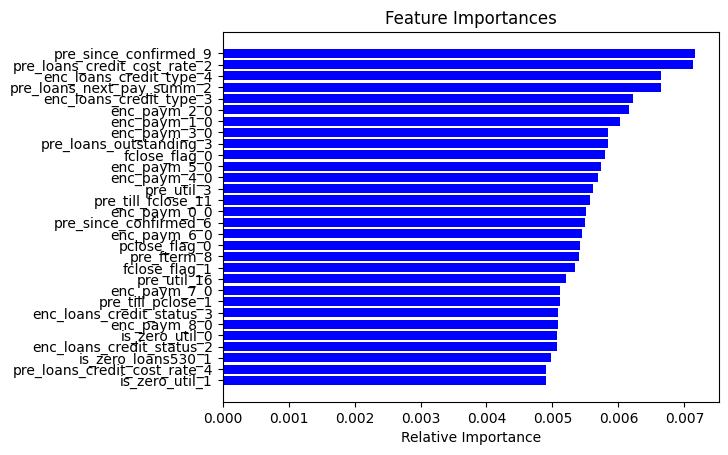

In [50]:
feature_names = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

threshold = 0.8

y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Model accuracy score : {0:0.4f}'. format(accuracy))
print('Model ROC AUC score : {0:0.4f}'. format(roc_auc))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.5s finished


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    216968
           1       0.12      0.00      0.00      8032

    accuracy                           0.96    225000
   macro avg       0.54      0.50      0.49    225000
weighted avg       0.93      0.96      0.95    225000

Model accuracy score : 0.9643
Model ROC AUC score : 0.6935


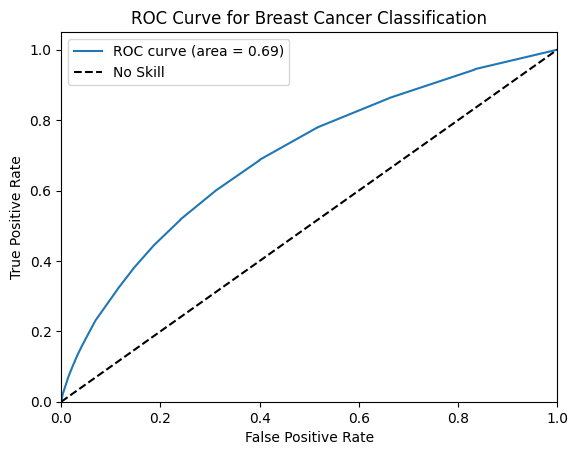

In [52]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

In [36]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(iterations=100,
                                    learning_rate=0.2,
                                    )

catboost_clf.fit(X_train, y_train)




0:	learn: 0.4398734	total: 702ms	remaining: 1m 9s
1:	learn: 0.3059316	total: 1.61s	remaining: 1m 19s
2:	learn: 0.2372480	total: 2.45s	remaining: 1m 19s
3:	learn: 0.1972867	total: 3.59s	remaining: 1m 26s
4:	learn: 0.1756954	total: 4.68s	remaining: 1m 28s
5:	learn: 0.1640697	total: 5.99s	remaining: 1m 33s
6:	learn: 0.1565170	total: 7.49s	remaining: 1m 39s
7:	learn: 0.1516520	total: 8.59s	remaining: 1m 38s
8:	learn: 0.1485601	total: 9.68s	remaining: 1m 37s
9:	learn: 0.1465574	total: 11.1s	remaining: 1m 40s
10:	learn: 0.1452076	total: 13s	remaining: 1m 45s
11:	learn: 0.1442514	total: 14.8s	remaining: 1m 48s
12:	learn: 0.1434762	total: 16.4s	remaining: 1m 49s
13:	learn: 0.1429809	total: 17.9s	remaining: 1m 49s
14:	learn: 0.1425790	total: 19.3s	remaining: 1m 49s
15:	learn: 0.1423676	total: 20.3s	remaining: 1m 46s
16:	learn: 0.1420418	total: 21.7s	remaining: 1m 46s
17:	learn: 0.1417262	total: 23s	remaining: 1m 44s
18:	learn: 0.1415310	total: 24.5s	remaining: 1m 44s
19:	learn: 0.1413551	total:

{'recall': 0.0007898894154818325, 'precision': 0.4883720930232558, 'f1': 0.0015772278343159714, 'roc_auc': 0.7547243353629947}


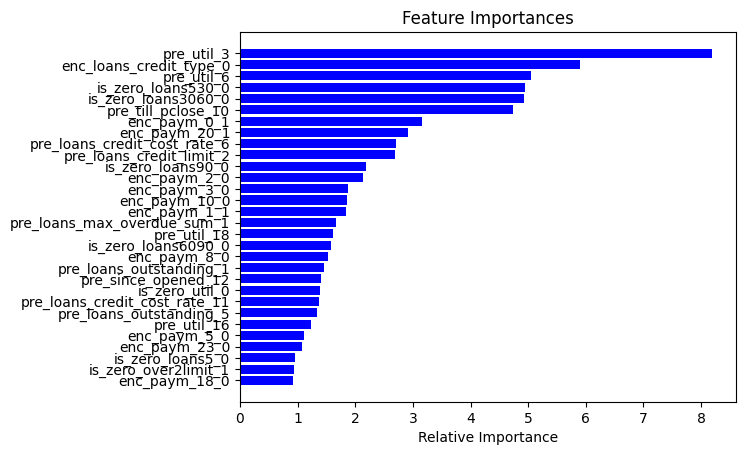

In [37]:
# Get predicted classes
y_pred = catboost_clf.predict(X_test)
# Get predicted probabilities for each class
y_pred_proba = catboost_clf.predict_proba(X_test)[:,1]

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
print(metrics)

feature_names = X_train.columns
importances = catboost_clf.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Оставляем только 50 самых важных фичей

In [20]:
features = [feature_names[i] for i in np.argsort(importances)[-50:]]
features.append("flag")
features

['enc_paym_7_3',
 'pre_loans_credit_limit_10',
 'is_zero_maxover2limit_1',
 'pre_loans_next_pay_summ_4',
 'pre_loans_next_pay_summ_1',
 'pre_loans_outstanding_2',
 'enc_paym_4_3',
 'pre_loans_credit_cost_rate_7',
 'enc_paym_5_3',
 'enc_paym_6_3',
 'pre_since_confirmed_16',
 'pre_since_confirmed_2',
 'pre_loans_credit_cost_rate_9',
 'is_zero_loans530_0',
 'pre_util_6',
 'pre_loans_outstanding_5',
 'enc_paym_10_0',
 'enc_paym_9_0',
 'pre_pterm_4',
 'pre_since_confirmed_10',
 'is_zero_util_0',
 'is_zero_util_1',
 'pre_loans_credit_cost_rate_4',
 'is_zero_loans530_1',
 'enc_paym_8_0',
 'enc_loans_credit_status_3',
 'enc_paym_7_0',
 'enc_loans_credit_status_2',
 'pre_till_pclose_1',
 'pre_util_16',
 'fclose_flag_1',
 'pclose_flag_0',
 'pre_fterm_8',
 'pre_since_confirmed_6',
 'pre_util_3',
 'enc_paym_6_0',
 'enc_paym_0_0',
 'pre_till_fclose_11',
 'enc_paym_4_0',
 'enc_paym_5_0',
 'fclose_flag_0',
 'enc_paym_3_0',
 'enc_paym_1_0',
 'pre_loans_outstanding_3',
 'enc_paym_2_0',
 'enc_loans_cred

In [21]:
df = df.filter(features)
X_train, X_test, y_train, y_test = train_test_split(df.drop('flag', axis=1), df['flag'], test_size=0.25, random_state=123)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 1477407 to 2297839
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   enc_paym_7_3                  900000 non-null  uint8   
 1   pre_loans_credit_limit_10     900000 non-null  uint8   
 2   is_zero_maxover2limit_1       900000 non-null  uint8   
 3   pre_loans_next_pay_summ_4     900000 non-null  uint8   
 4   pre_loans_next_pay_summ_1     900000 non-null  uint8   
 5   pre_loans_outstanding_2       900000 non-null  uint8   
 6   enc_paym_4_3                  900000 non-null  uint8   
 7   pre_loans_credit_cost_rate_7  900000 non-null  uint8   
 8   enc_paym_5_3                  900000 non-null  uint8   
 9   enc_paym_6_3                  900000 non-null  uint8   
 10  pre_since_confirmed_16        900000 non-null  uint8   
 11  pre_since_confirmed_2         900000 non-null  uint8   
 12  pre_loans_credit_cost_rate_9

In [40]:
df_for_rfe = df.sample(frac=0.02)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(df_for_rfe.drop('flag', axis=1), df_for_rfe['flag'], test_size=0.25, random_state=123)
df_for_rfe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 1070991 to 2444394
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   enc_paym_7_3                  18000 non-null  uint8   
 1   pre_loans_credit_limit_10     18000 non-null  uint8   
 2   is_zero_maxover2limit_1       18000 non-null  uint8   
 3   pre_loans_next_pay_summ_4     18000 non-null  uint8   
 4   pre_loans_next_pay_summ_1     18000 non-null  uint8   
 5   pre_loans_outstanding_2       18000 non-null  uint8   
 6   enc_paym_4_3                  18000 non-null  uint8   
 7   pre_loans_credit_cost_rate_7  18000 non-null  uint8   
 8   enc_paym_5_3                  18000 non-null  uint8   
 9   enc_paym_6_3                  18000 non-null  uint8   
 10  pre_since_confirmed_16        18000 non-null  uint8   
 11  pre_since_confirmed_2         18000 non-null  uint8   
 12  pre_loans_credit_cost_rate_9  18000 non-nul

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector 

sfs = SequentialFeatureSelector(RandomForestClassifier(n_estimators=50, n_jobs=-1), 
                                k_features="best",
                                # k_features=6,
                                forward=True,
                                # forward=False,
                                floating=False, # True to drop selected features
                                scoring='roc_auc',
                                cv=2,
                                verbose=2,
                                n_jobs = -1
                                )

sfs.fit(X_train_rfe,y_train_rfe)

with open("rfe_sfs_cols.txt", "w") as output:
    output.write(str(sfs.k_feature_names_))
with open("rfe_sfs_idx.txt", "w") as output:
    output.write(str(sfs.k_feature_idx_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished

[2024-11-24 21:23:03] Features: 1/50 -- score: 0.5680432355707692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    5.9s finished

[2024-11-24 21:23:09] Features: 2/50 -- score: 0.581542457381405[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.1s finished

[2024-11-24 21:23:15] Features: 3/50 -- score: 0.588101763411039[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    7.6s finished

[2024-11-24 21:23:23] Features: 4/50 -- sco

In [43]:
selected_features_sfs = X_train.loc[:, sfs.k_feature_names_]
selected_features_sfs

,enc_paym_7_3,enc_paym_6_3,pre_since_confirmed_2,is_zero_loans530_0,pre_since_confirmed_10,is_zero_util_0,pre_loans_credit_cost_rate_4,is_zero_loans530_1,pre_till_pclose_1,pre_since_confirmed_6,pre_till_fclose_11,enc_paym_5_0
1246455,2,2,1,2,0,4,0,3,2,0,3,3
2695106,5,4,0,2,0,2,3,7,2,0,2,5
254849,3,3,0,3,0,4,2,7,3,0,4,8
525229,6,6,0,1,1,6,0,15,0,2,4,12
2601537,2,4,0,4,4,5,0,6,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
220230,0,0,0,2,0,2,0,1,1,0,1,3
1273865,1,1,0,0,0,1,0,1,1,0,1,0
1410361,2,3,0,3,0,2,0,3,1,0,4,1
1102263,0,0,0,1,0,0,0,0,0,0,0,1


Best accuracy score: 0.63
Best subset (indices): [0, 9, 11, 13, 19, 20, 22, 23, 28, 33, 37, 39]
Best subset (corresponding names): ['enc_paym_7_3', 'enc_paym_6_3', 'pre_since_confirmed_2', 'is_zero_loans530_0', 'pre_since_confirmed_10', 'is_zero_util_0', 'pre_loans_credit_cost_rate_4', 'is_zero_loans530_1', 'pre_till_pclose_1', 'pre_since_confirmed_6', 'pre_till_fclose_11', 'enc_paym_5_0']


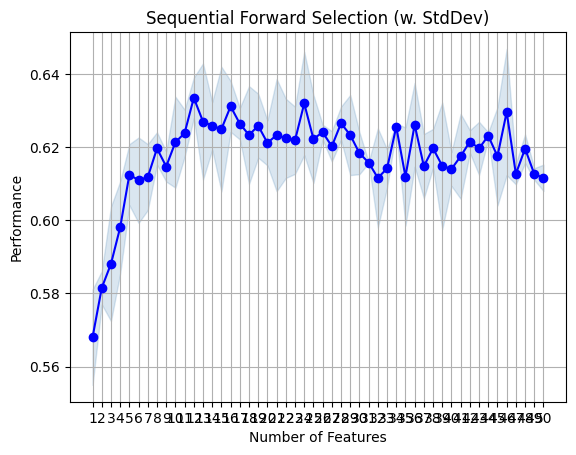

In [44]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

rfe_sfs_idx = list(sfs.k_feature_idx_)
rfe_sfs_col = list(sfs.k_feature_names_)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', rfe_sfs_idx)
print('Best subset (corresponding names):', rfe_sfs_col)


fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

In [ ]:
class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        return X[:,self.cols]
    
    def fit(self, X, y=None):
        return self

In [ ]:
from sklearn.preprocessing import QuantileTransformer, SplineTransformer, PolynomialFeatures, MinMaxScaler, KBinsDiscretizer

pf = PolynomialFeatures(degree=2)
qt = QuantileTransformer()
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
s_scaler = StandardScaler()
t_encoder = TargetEncoder()
classifier = RandomForestClassifier(n_estimators=100, max_depth=100)

In [ ]:
num_features = list(df.select_dtypes(include=['number']).columns)
num_features

In [ ]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
    ],
    remainder='drop') # Удаляем столбцы, которые не затронуты преобразования

In [ ]:
rfe_sfs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', classifier)
])

rfe_sfs_pipeline.fit(X_train, y_train)

y_pred_proba = rfe_sfs_pipeline.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   
metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics

In [ ]:
X_train_fe_sklearn = X_train.copy()
Y_train_fe_sklearn = y_train.copy()

In [ ]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('poly', Pipeline(steps=[
                                    ('poly', pf),
                                    ('scale', StandardScaler())
                                ]), num_features
            ), # В преобразования добавляем созданный ранее pipeline
        ('kbins', kb, num_features),
    ],
    remainder='drop') # Удаляем столбцы, которые не затронуты преобразования

In [ ]:
X_train_fe_sklearn_raw = preprocessor_sklearn.fit_transform(X_train_fe_sklearn, Y_train_fe_sklearn)
X_train_fe_sklearn = pd.DataFrame(X_train_fe_sklearn_raw, columns=preprocessor_sklearn.get_feature_names_out())

In [ ]:
X_train_fe_sklearn.columns

Index(['num__pre_pterm_4', 'num__pre_loans_credit_cost_rate_5',
       'num__is_zero_maxover2limit_1', 'num__enc_loans_credit_status_2',
       'num__enc_paym_9_0', 'num__pre_util_3',
       'num__enc_loans_credit_status_3', 'num__pre_till_pclose_1',
       'num__pre_fterm_8', 'num__fclose_flag_1',
       ...
       'kbins__enc_paym_6_0', 'kbins__pre_util_16',
       'kbins__enc_loans_credit_type_3', 'kbins__pre_loans_next_pay_summ_2',
       'kbins__fclose_flag_0', 'kbins__enc_paym_3_0', 'kbins__is_zero_util_1',
       'kbins__is_zero_loans530_1', 'kbins__enc_loans_credit_type_4',
       'kbins__enc_paym_2_0'],
      dtype='object', length=556)

In [ ]:
pipeline_sklearn = Pipeline(steps=[('preprocessor', preprocessor_sklearn), 
                           ('model', classifier)])

pipeline_sklearn.fit(X_train, y_train)

y_pred_proba = pipeline_sklearn.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics

/home/yuriy/ProgrammingProjects/DecSystem/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'recall': np.float64(0.0),
 'precision': np.float64(0.0),
 'f1': np.float64(0.0),
 'roc_auc': np.float64(0.6549707328888144)}

In [ ]:
import optuna

def objective(trial):
    # предлагаем гиперпараметры
    n_estimators = trial.suggest_int('n_estimators', 1, 200)
    max_depth = trial.suggest_int('max_depth', 1, 200)
    max_features = trial.suggest_float('max_features', 0.1, 1)

    # создаём и обучаем модель
    opt_pipeline  = Pipeline(steps=[
        ('preprocessor', preprocessor_sklearn), 
        ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
        ('model', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features))
    ])

    opt_pipeline.fit(X_train, y_train)

    # предсказываем и вычисляем ROC_AUC
    y_pred_proba = opt_pipeline.predict_proba(X_test)[:,1]
    roc_auc =  roc_auc_score(y_test, y_pred_proba)

    return roc_auc

In [ ]:
# Запускаем оптимизацию
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)
best_params = study.best_trial.params
# Выводим лучшие гиперпараметры
print('Number of finished trials:', len(study.trials))
print('Best trial:', best_params)

In [ ]:
opt_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', RandomForestClassifier(**best_params))
])

opt_pipeline.fit(X_train, y_train)

In [ ]:
y_pred_proba = opt_pipeline.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   
metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics